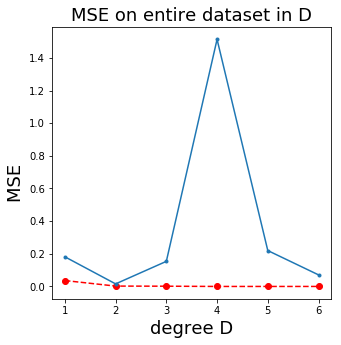

In [35]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division
import pylab
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split


# load data
def load_data():
    data = np.array(np.genfromtxt('galileo_ramp_data.csv', delimiter=','))
    x = np.reshape(data[:,0],(np.size(data[:,0]),1))
    y = np.reshape(data[:,1],(np.size(data[:,1]),1))
    return x,y



def poly_features(X_train,D):
    F = []
    for m in np.arange(1,D+1):
        F.append(X_train**m)

    temp1 = np.reshape(F,(D,np.shape(X_train)[0])).T
    temp2 = np.concatenate((np.ones((np.shape(temp1)[0],1)),temp1),1)
    F = temp2.T   
    return F

def poly_features1(X_test,D):
    F = []
    for m in np.arange(1,D+1):
        F.append(X_test**m)

    temp1 = np.reshape(F,(D,np.shape(X_test)[0])).T
    temp2 = np.concatenate((np.ones((np.shape(temp1)[0],1)),temp1),1)
    F = temp2.T    
    return F

# plot the polynomial  
def plot_model(w,D):
    # plot determined surface in 3d space
    s = np.arange(0,1,.01)
    f = poly_features(s,D)
    #print(f.T.shape)
    #print(w.shape)
    z = np.dot(f.T,w)
    

    # plot contour in original space
    plt.plot(s,z, color = 'r', linewidth = 2)
    plt.ylim([-1.5,1.5])
    plt.xlim([0,1])

# plot mse's over all D tested 
def plot_mse(mses,mses1,deg):
    plt.plot(np.arange(1,np.size(mses)+1),mses,'ro--')   
    plt.plot(np.arange(1,np.size(mses1)+1),mses1,'.-')    
    plt.title('MSE on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('MSE       ', fontsize=18)

   # plot data 
#def plot_data(x,y,deg):
    

        # graph info labels
    #s = 'D = ' + str(deg[1])
    #plt.title(s, fontsize=15)
    #plt.axis('off')    
        
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(deg_range):
    # plot datapoints - one panel for each deg in deg_range
    fig = plt.figure(figsize = (8,4))
    

    # generate nonlinear feature
    
    
    kf = KFold(n_splits=6)
    KFold(n_splits=6)
    k=6
    
    mse_Train=[]
    mse1_Test=[]
    mse_Train = np.zeros((np.size(deg_range)))
    mse1_Test = np.zeros((np.size(deg_range)))
    
    for D in np.arange(0,len(deg_range)):
        
        # generate poly feature transformation
            for train_index, test_index in kf.split(x):   
                    X_train, X_test = x[train_index], x[test_index]
                    Y_train, Y_test = y[train_index], y[test_index] 
        
                    F = poly_features(X_train,deg_range[D])
                   
                    F1 = poly_features1(X_test,deg_range[D])
                                      
                    temp = np.linalg.pinv(np.dot(F,F.T))
                    w = np.dot(np.dot(temp,F),Y_train)
                    mse = np.linalg.norm(np.dot(F.T,w)-Y_train)/(np.size(Y_train))
                    mse_Train[D]+=mse  
       
                
                    temp1 = np.linalg.pinv(np.dot(F1,F1.T))
                
                    mse1 = np.linalg.norm(np.dot(F1.T,w)-Y_test)/(np.size(Y_test))   
                    
                    mse1_Test[D] +=mse1
                    
            mse_Train[D]=mse_Train[D]/k
            mse1_Test[D]=mse1_Test[D]/k 
            
            
    
    fig = plt.figure(figsize = (5,5))
    plot_mse(mse_Train,mse1_Test,deg_range)
    plt.show()
    plt.scatter(x,y, color = 'k')
    min_=np.argmin(mse1_Test)  
    plot_model(w,deg_range[min_])    
        
deg_range = [1,2,3,4,5,6]           # degree polys to try
x,y=load_data()
# run all over degree range
try_all_degs(deg_range)  

